# EDA ON DENGAI DATASET

- **Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


Let us read the  feature and labels csv file in dataframe using read.csv method from pandas and also find the cardinality of the dataset.

In [2]:
df=pd.read_csv("dengue_features_train.csv")
df.shape

(1456, 24)

- There are 24 columns and 1456 samples in the feature train dataset.

Let us see some samples from the feature train dataset.

In [3]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
df2=pd.read_csv("dengue_labels_train.csv")
df2.shape

(1456, 4)

- There are 4 columns and 1456 samples in the labels train dataset

let us see some samples from the label train dataset.

In [5]:
df2.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


-From the above details we can see that,in both the dataset some features are in common.They can be merged.

As they have city,year and week of the year as common features let us merge them using merge() method from pandas on these columns.

In [6]:
df_merge=pd.merge(df,df2,how='left',left_on=['city','year','weekofyear'],right_on=['city','year','weekofyear'])
df_merge.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


-Let us now find the size of the merged dataset.

In [7]:
df_merge.shape

(1456, 25)

We can see that there are 25 columns and 1456 samples are there in the updated dataset.

### **Knowing the Dataset**


Let's first know what information the dataset contains.

The data has columns:


In [8]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

Let us find out the no. of null or missing values in the dataset.

In [9]:
df_merge.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

Now let us find the unique values in each feature

In [10]:
df_merge.nunique()

city                                        2
year                                       21
weekofyear                                 53
week_start_date                          1049
ndvi_ne                                  1214
ndvi_nw                                  1365
ndvi_se                                  1395
ndvi_sw                                  1388
precipitation_amt_mm                     1157
reanalysis_air_temp_k                    1176
reanalysis_avg_temp_k                     600
reanalysis_dew_point_temp_k              1180
reanalysis_max_air_temp_k                 141
reanalysis_min_air_temp_k                 117
reanalysis_precip_amt_kg_per_m2          1039
reanalysis_relative_humidity_percent     1370
reanalysis_sat_precip_amt_mm             1157
reanalysis_specific_humidity_g_per_kg    1171
reanalysis_tdtr_k                         519
station_avg_temp_c                        492
station_diur_temp_rng_c                   470
station_max_temp_c                

As we saw above in the information that there are 2 features which have been taken as object but they are of other datatype.

Therefore,let us change the datatypes of that.

In [11]:
df_merge.week_start_date = pd.to_datetime(df_merge.week_start_date)
df_merge['city'] = df_merge['city'].astype('string')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   string        
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1446 non-null   float64 

In [12]:
import warnings
warnings.filterwarnings('ignore')

Let us find the statistical inference for the given features

In [13]:
for column in df_merge.columns[5:24]:  
    mean = df[column].mean()
    max = df[column].max()
    min = df[column].min()
    std_dev = df[column].std()
    q25 = df[column].quantile(0.25)
    q50 = df[column].quantile(0.5)
    q75 = df[column].quantile(0.75)
    print(f"The mean of {column} is {mean}")
    print(f"The max of {column} is {max}")
    print(f"The min of {column} is {min}")
    print(f"The standard deviation of {column} is {std_dev}")
    print(f"The 25th percentile of {column} is {q25}")
    print(f"The 50th percentile of {column} is {q50}")
    print(f"The 75th percentile of {column} is {q75}")
    print("__________________________________________________________________")


The mean of ndvi_nw is 0.13055257610470083
The max of ndvi_nw is 0.4544286
The min of ndvi_nw is -0.4561
The standard deviation of ndvi_nw is 0.11999906267761298
The 25th percentile of ndvi_nw is 0.0492166675
The 50th percentile of ndvi_nw is 0.1214286
The 75th percentile of ndvi_nw is 0.2166
__________________________________________________________________
The mean of ndvi_se is 0.20378318902580195
The max of ndvi_se is 0.5383143
The min of ndvi_se is -0.01553333
The standard deviation of ndvi_se is 0.07385973904332568
The 25th percentile of ndvi_se is 0.155087475
The 50th percentile of ndvi_se is 0.19605
The 75th percentile of ndvi_se is 0.24884582500000002
__________________________________________________________________
The mean of ndvi_sw is 0.20230549071129708
The max of ndvi_sw is 0.5460167
The min of ndvi_sw is -0.06345714
The standard deviation of ndvi_sw is 0.08390267778770004
The 25th percentile of ndvi_sw is 0.144208725
The 50th percentile of ndvi_sw is 0.18945
The 75th p

Let us change the temperature to a standard unit Kelvin:

In [14]:
df_merge[['station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c']]+=273.15
print(df_merge[['station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c']])

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0             298.592857               280.050000              302.55   
1             299.864286               279.521429              304.85   
2             299.864286               279.635714              305.35   
3             300.621429               279.921429              306.45   
4             302.092857               282.521429              308.15   
...                  ...                      ...                 ...   
1451          301.783333               285.083333              308.55   
1452          300.583333               283.650000              307.85   
1453          297.550000               280.050000              305.35   
1454          298.583333               281.883333              304.35   
1455          300.625000               283.050000              306.85   

      station_min_temp_c  
0                 293.15  
1                 295.35  
2                 295.95  
3              

In [15]:
df_merge.rename(columns={'station_avg_temp_c':'station_avg_temp_K','station_diur_temp_rng_c':'station_diur_temp_rng_K',
                         'station_max_temp_c':'station_max_temp_K','station_min_temp_c':'station_min_temp_K'},inplace= True)

In [16]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   string        
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1446 non-null   float64 

Let us find out the outliers present in the features.

<Axes: >

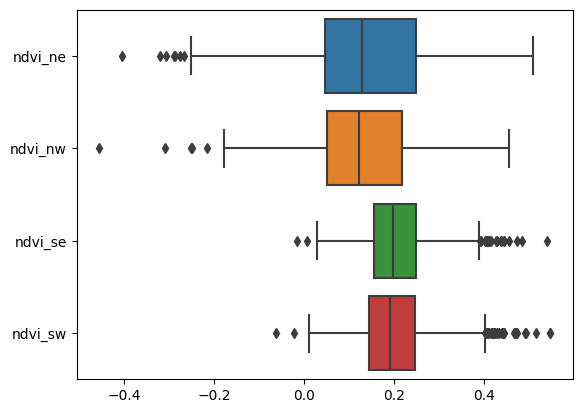

In [17]:
sns.boxplot(data=df_merge[["ndvi_ne", "ndvi_nw","ndvi_se", "ndvi_sw"]], orient="h")

<Axes: xlabel='precipitation_amt_mm'>

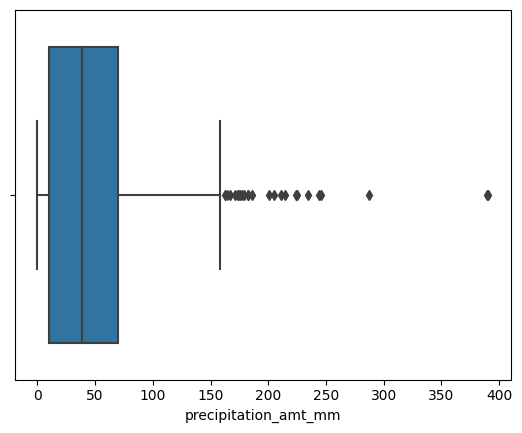

In [18]:
sns.boxplot(x=df_merge['precipitation_amt_mm'])

<Axes: >

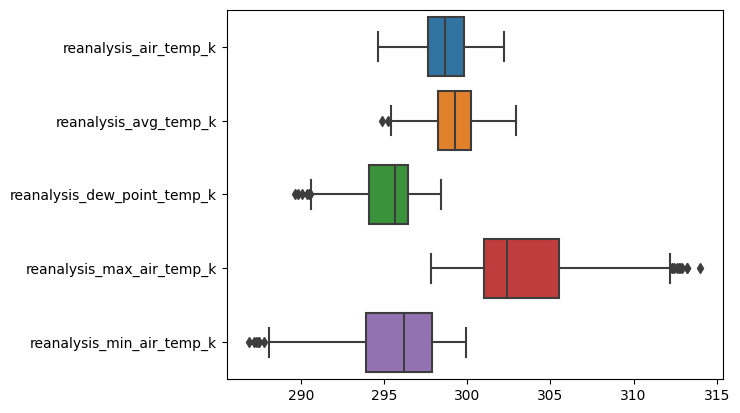

In [19]:
sns.boxplot(data=df_merge[["reanalysis_air_temp_k", "reanalysis_avg_temp_k","reanalysis_dew_point_temp_k", "reanalysis_max_air_temp_k","reanalysis_min_air_temp_k"]], orient="h")

<Axes: xlabel='reanalysis_precip_amt_kg_per_m2'>

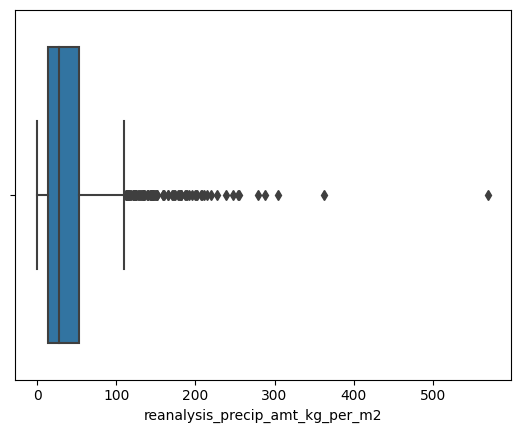

In [20]:
sns.boxplot(x=df_merge['reanalysis_precip_amt_kg_per_m2'])

<Axes: xlabel='reanalysis_relative_humidity_percent'>

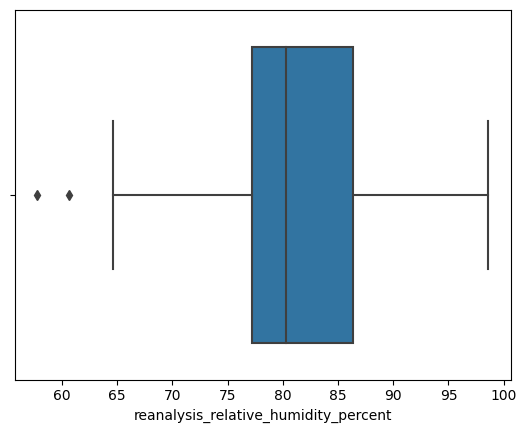

In [21]:
sns.boxplot(x=df_merge['reanalysis_relative_humidity_percent'])

<Axes: xlabel='reanalysis_sat_precip_amt_mm'>

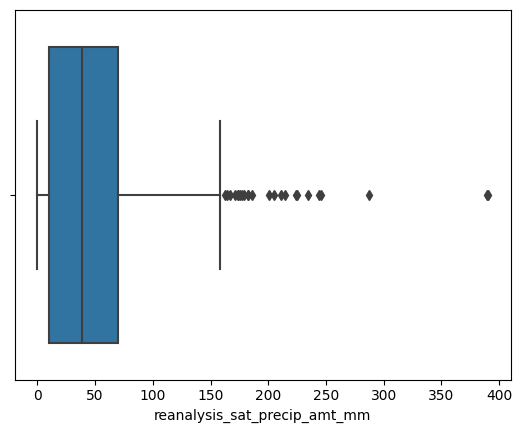

In [22]:
sns.boxplot(x=df_merge['reanalysis_sat_precip_amt_mm'])

<Axes: xlabel='reanalysis_specific_humidity_g_per_kg'>

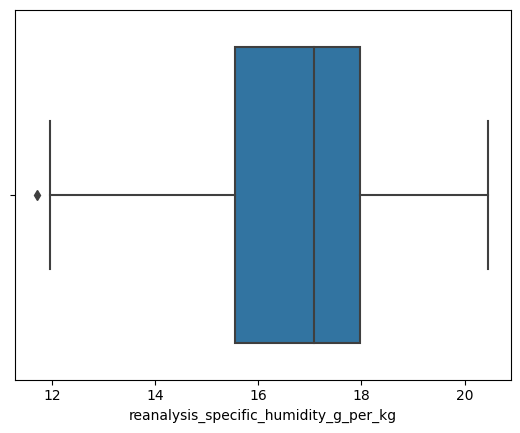

In [23]:
sns.boxplot(x=df_merge['reanalysis_specific_humidity_g_per_kg'])

<Axes: xlabel='reanalysis_tdtr_k'>

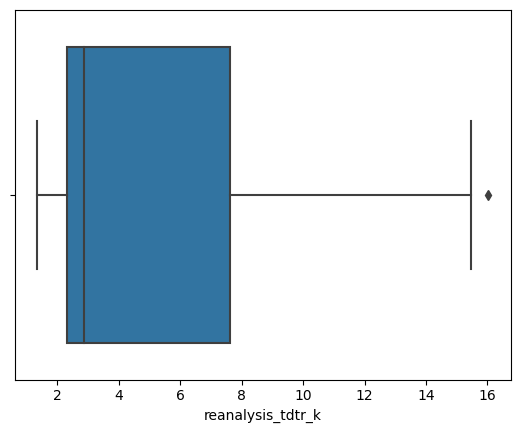

In [24]:
sns.boxplot(x=df_merge['reanalysis_tdtr_k'])

<Axes: >

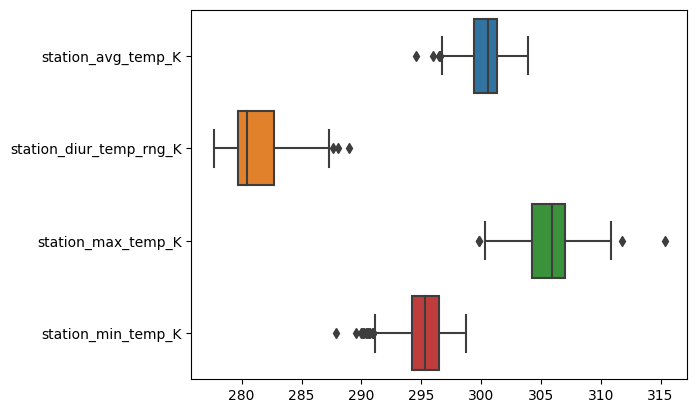

In [25]:
sns.boxplot(data=df_merge[["station_avg_temp_K", "station_diur_temp_rng_K","station_max_temp_K", "station_min_temp_K"]], orient="h")

<Axes: xlabel='total_cases'>

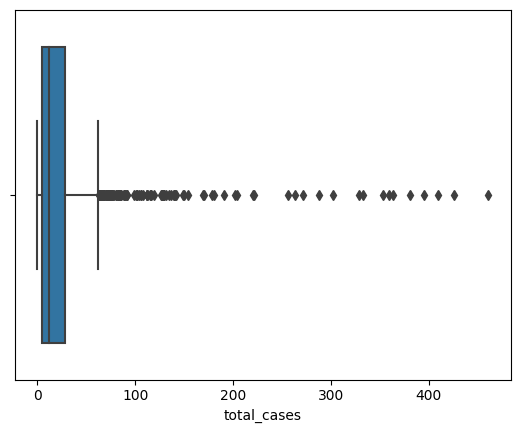

In [26]:
sns.boxplot(x=df_merge['total_cases'])

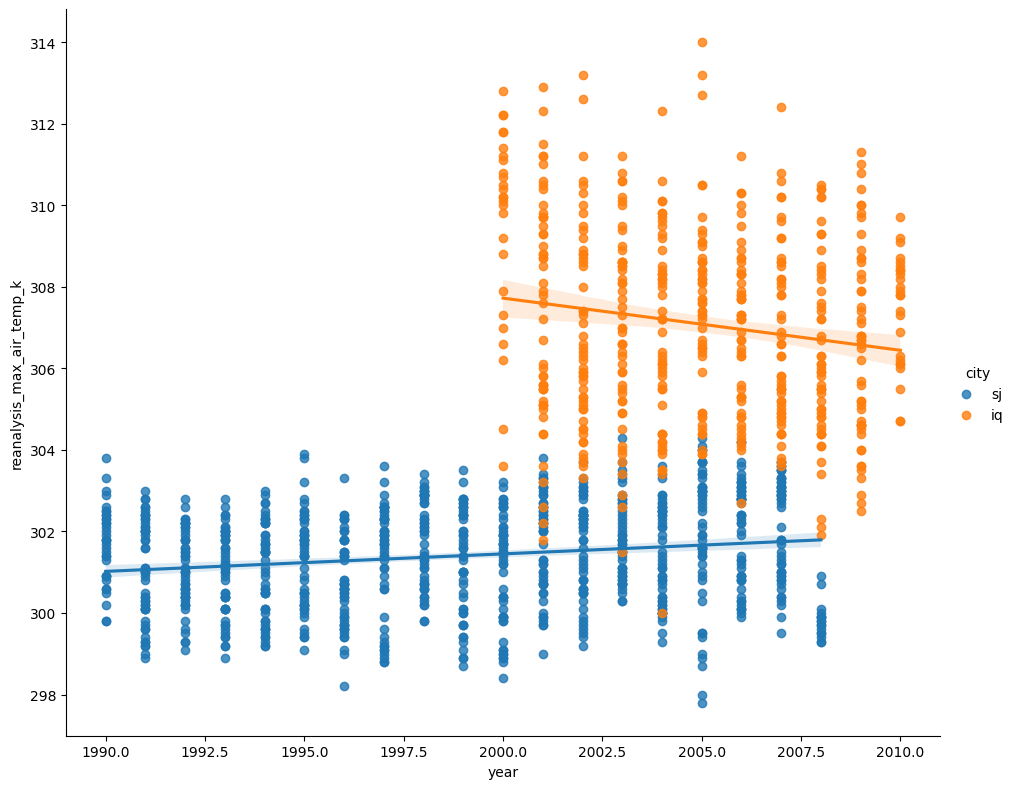

In [27]:
sns.lmplot(data=df_merge, x="year", y="reanalysis_max_air_temp_k",hue="city", height=8, aspect=1.2)

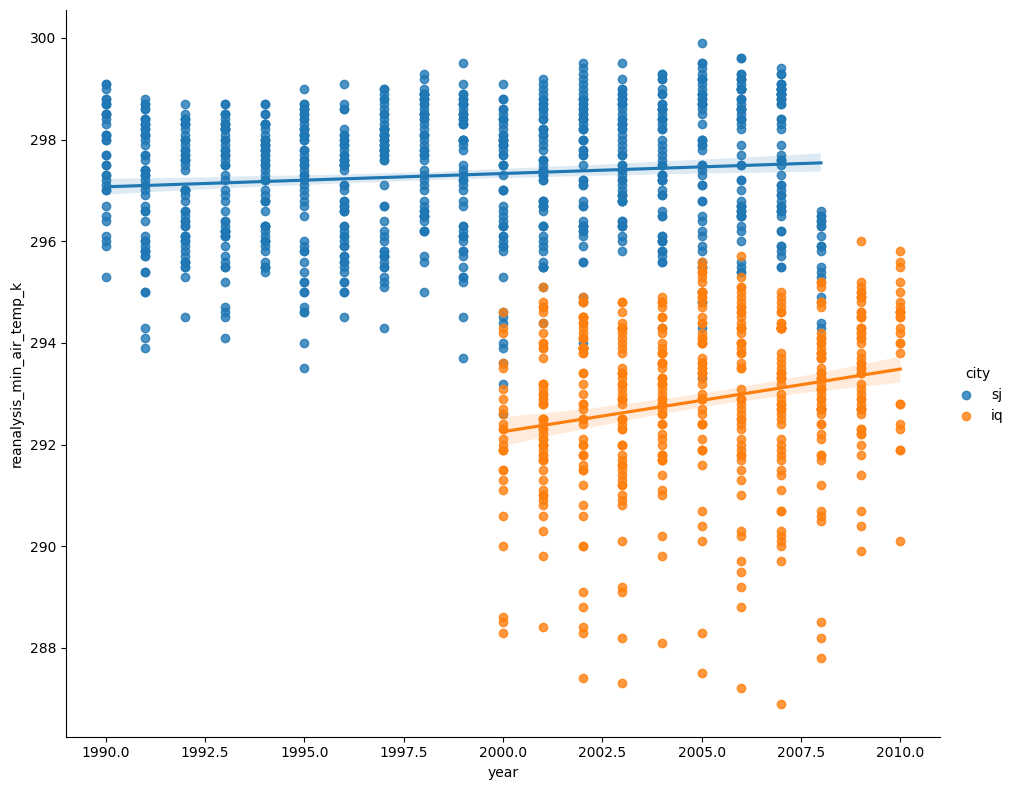

In [28]:
sns.lmplot(data=df_merge, x="year", y="reanalysis_min_air_temp_k",hue="city", height=8, aspect=1.2)

<Axes: xlabel='reanalysis_max_air_temp_k', ylabel='ndvi_ne'>

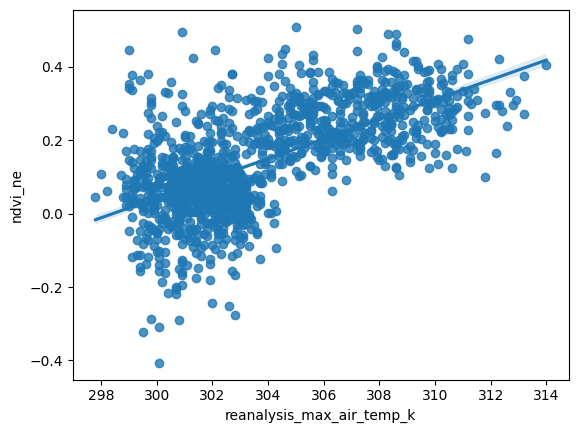

In [29]:
sns.regplot(x='reanalysis_max_air_temp_k',y='ndvi_ne',data=df_merge)

We can see that city Iquitos(0) has most minimum temperature compared to San Juan(1)

The lowest air temperature was seen in the year 2007 in Iquitos(0) and in 2000 in  San Juan(1).

<Axes: xlabel='reanalysis_min_air_temp_k', ylabel='ndvi_ne'>

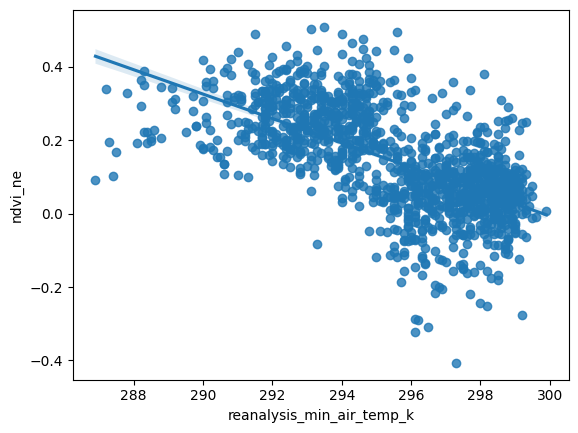

In [30]:
sns.regplot(x='reanalysis_min_air_temp_k',y='ndvi_ne',data=df_merge)

<Axes: xlabel='reanalysis_min_air_temp_k', ylabel='total_cases'>

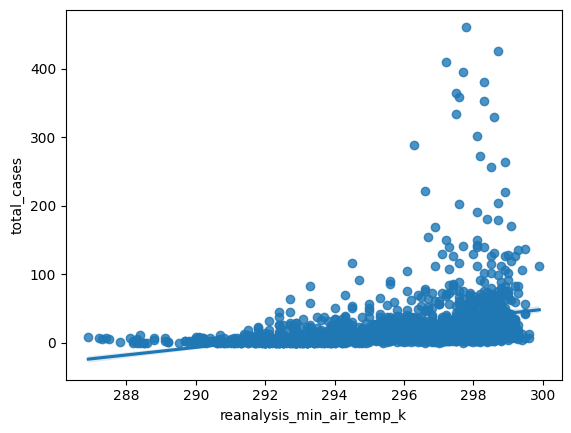

In [31]:
sns.regplot(x='reanalysis_min_air_temp_k',y='total_cases',data=df_merge)

Now let us see individual features:

Let us handle the reanalysis feature's missing values by impute by mean method.

In [32]:
df_merge['reanalysis_air_temp_k'].fillna(df_merge['reanalysis_air_temp_k'].mean(),inplace= True)
df_merge['reanalysis_avg_temp_k'].fillna(df_merge['reanalysis_avg_temp_k'].mean(),inplace= True)
df_merge['reanalysis_dew_point_temp_k'].fillna(df_merge['reanalysis_dew_point_temp_k'].mean(),inplace= True)
df_merge['reanalysis_min_air_temp_k'].fillna(df_merge['reanalysis_min_air_temp_k'].mean(),inplace= True)
df_merge['reanalysis_max_air_temp_k'].fillna(df_merge['reanalysis_max_air_temp_k'].mean(),inplace= True)
df_merge['reanalysis_precip_amt_kg_per_m2'].fillna(df_merge['reanalysis_precip_amt_kg_per_m2'].mean(),inplace= True)
df_merge['reanalysis_relative_humidity_percent'].fillna(df_merge['reanalysis_relative_humidity_percent'].mean(),inplace= True)
df_merge['reanalysis_sat_precip_amt_mm'].fillna(df_merge['reanalysis_sat_precip_amt_mm'].mean(),inplace= True)
df_merge['reanalysis_specific_humidity_g_per_kg'].fillna(df_merge['reanalysis_specific_humidity_g_per_kg'].mean(),inplace= True)
df_merge['reanalysis_tdtr_k'].fillna(df_merge['reanalysis_tdtr_k'].mean(),inplace= True)


In [33]:
df_merge.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                      0
reanalysis_avg_temp_k                      0
reanalysis_dew_point_temp_k                0
reanalysis_max_air_temp_k                  0
reanalysis_min_air_temp_k                  0
reanalysis_precip_amt_kg_per_m2            0
reanalysis_relative_humidity_percent       0
reanalysis_sat_precip_amt_mm               0
reanalysis_specific_humidity_g_per_kg      0
reanalysis_tdtr_k                          0
station_avg_temp_K                        43
station_diur_temp_rng_K                   43
station_max_temp_K                        20
station_mi

Let us perform label encoding on city:
Let us name Sj as 1 and iq as 0

In [34]:
x=LabelEncoder()

In [35]:
df_merge["city"]=x.fit_transform(df_merge["city"])

In [36]:
print(df_merge['city'].unique())
print(df_merge.head(2))
print('\n')
print(df_merge.tail(2))

[1 0]
   city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0     1  1990          18      1990-04-30   0.1226  0.103725  0.198483   
1     1  1990          19      1990-05-07   0.1699  0.142175  0.162357   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   

   station_avg_temp_K  station_diur_temp_rng_K  station_max_temp_K  \
0          298.592857               280.050000              302.55   
1          299.864286    

In [37]:
df_merge['city'].unique()

array([1, 0])

<function matplotlib.pyplot.show(close=None, block=None)>

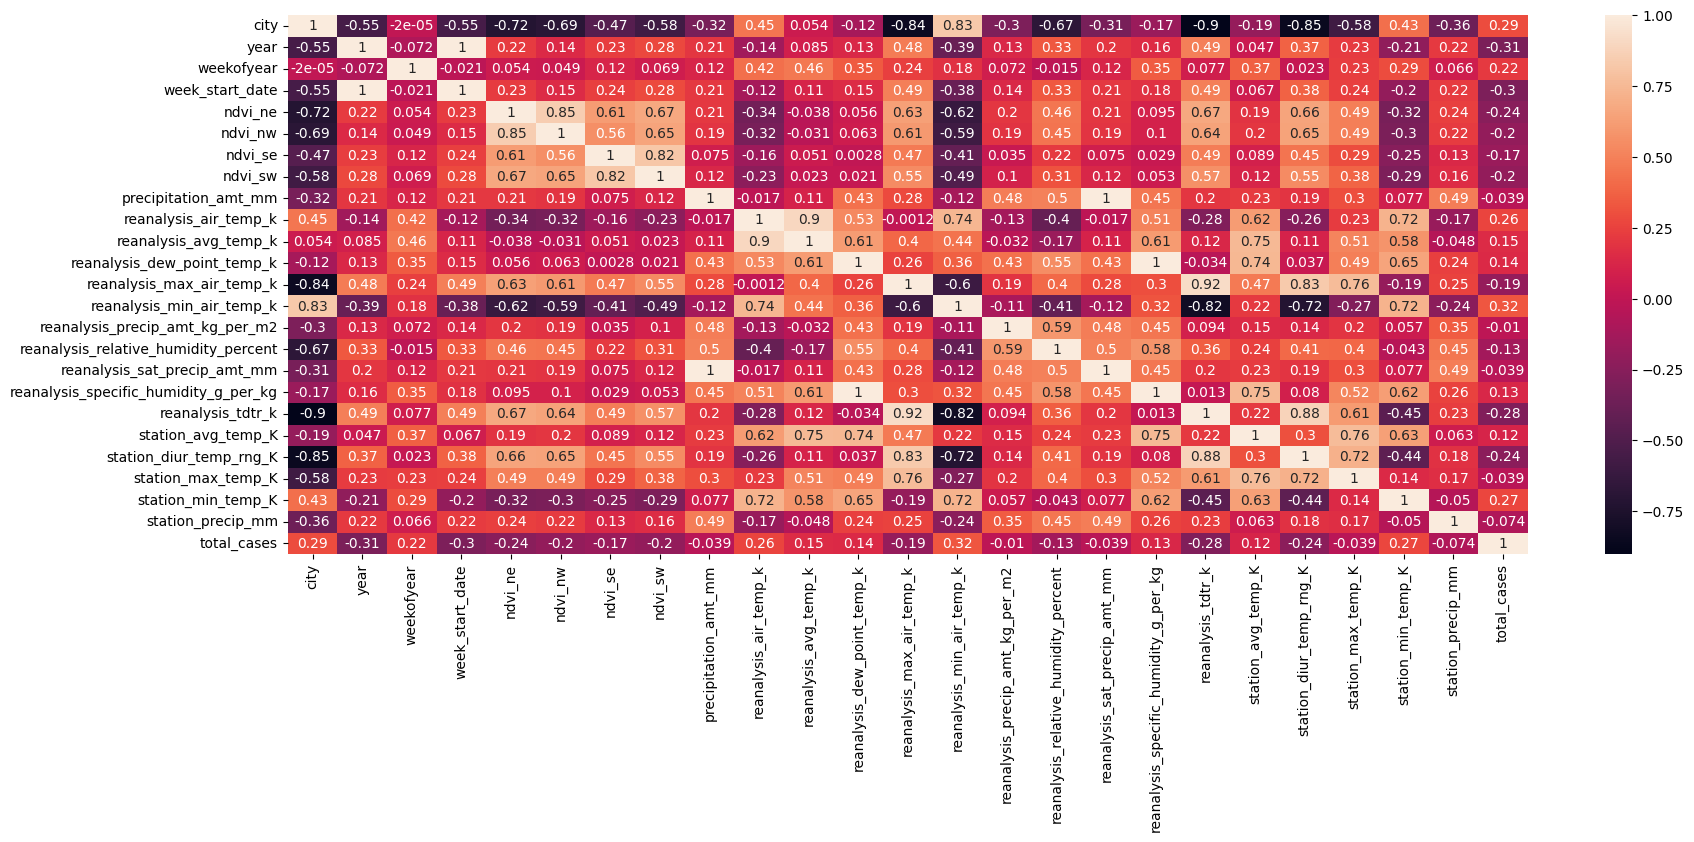

In [38]:
df_merge.corr()
corr = df_merge.corr()
fig, ax = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(data=corr, annot=True, ax=ax)
plt.show

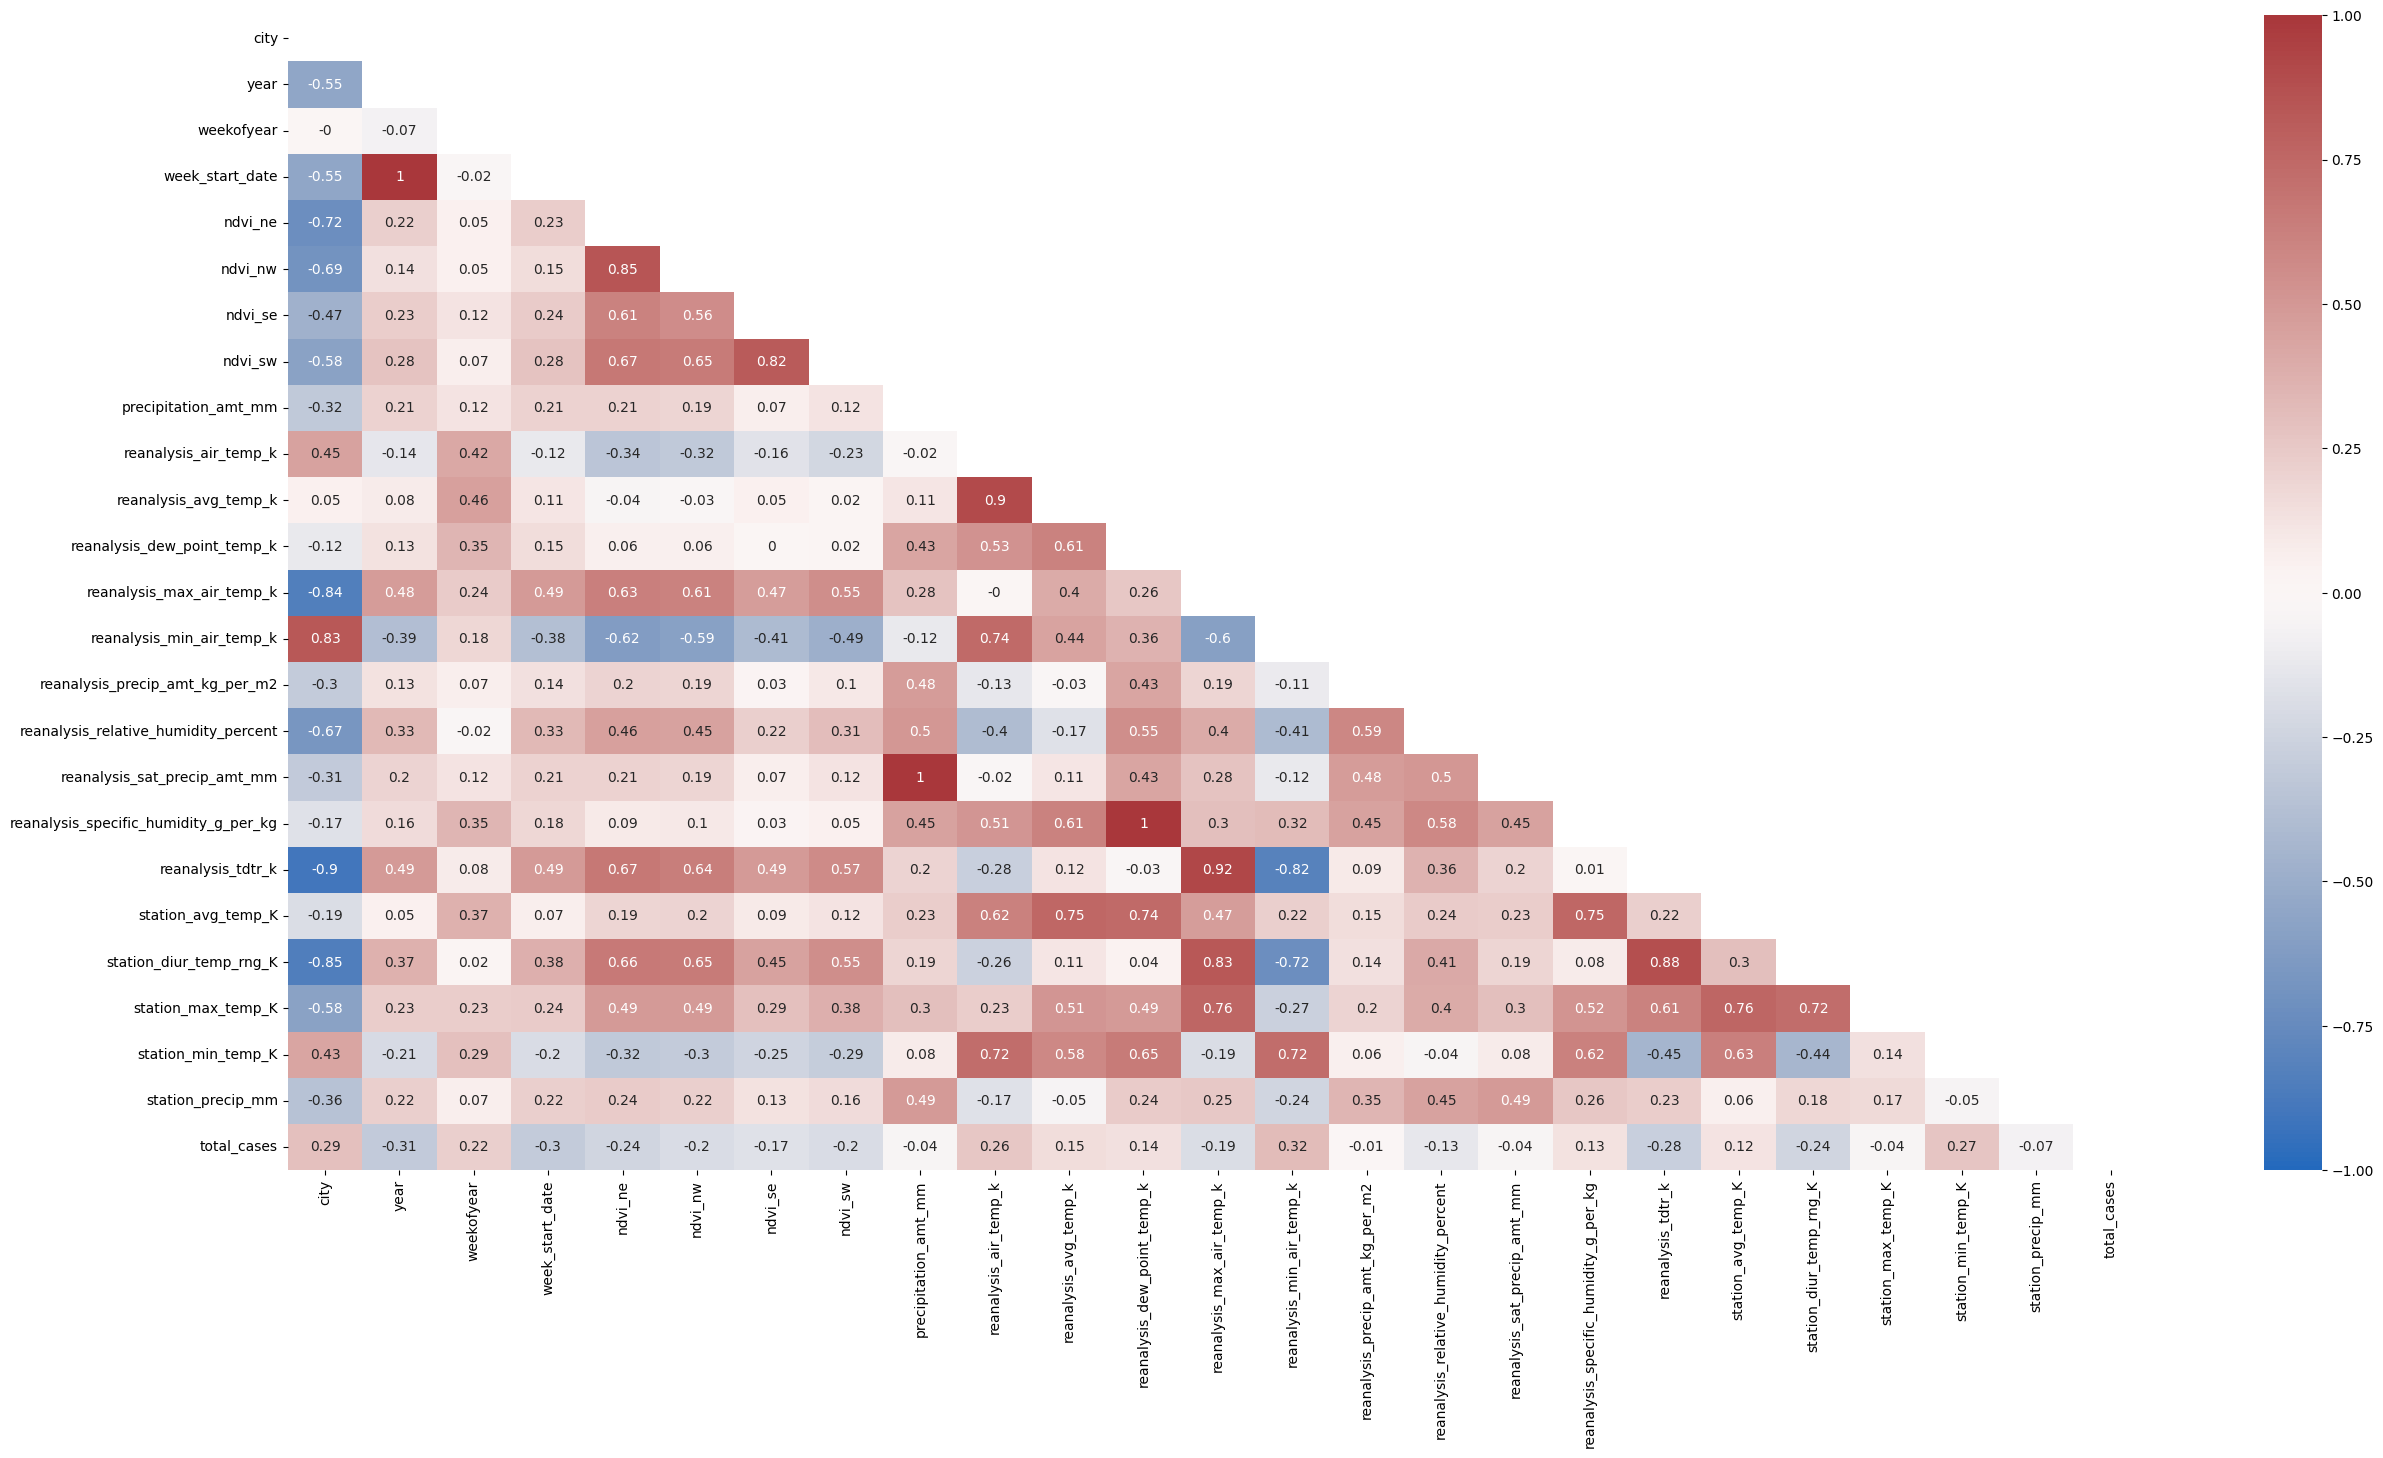

In [39]:
matrix = df_merge.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

Now let us find the statistical inferences:

## 1)Among both cities which is highly prone to disease?


Let us find the total no of cases filed over the years in the interval of 1990-2010 in both the cities.

In [40]:
total=df_merge["total_cases"].sum()
print("Total cases over the years",total)

Total cases over the years 35927


Now let us look the total no of cases in both cities over the years.

In [41]:
df_sj=df_merge[df_merge['city']==1]
print(df_sj.shape)
df_iq=df_merge[df_merge['city']==0]
print(df_iq.shape)
total_sj=df_sj['total_cases'].sum()
print("total cases in San Juan",total_sj)
total_iq=df_iq['total_cases'].sum()
print("total cases in Iquitos",total_iq)


(936, 25)
(520, 25)
total cases in San Juan 31993
total cases in Iquitos 3934


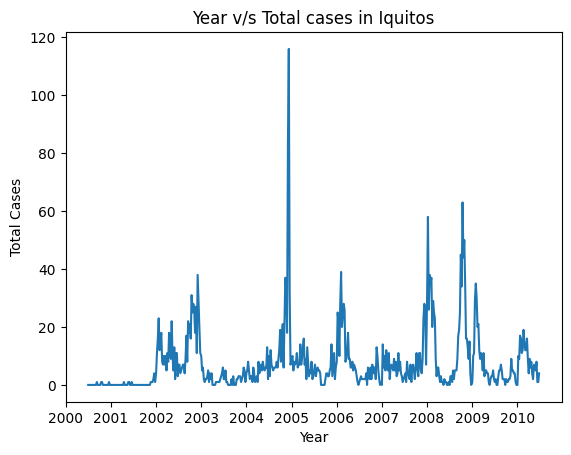

<Figure size 2000x700 with 0 Axes>

In [42]:
fig,ax=plt.subplots()
plt.figure(figsize=(20,7))
ax.plot(df_iq.week_start_date,df_iq["total_cases"])
ax.set_title('Year v/s Total cases in Iquitos')
ax.set_xlabel('Year')
ax.set_ylabel("Total Cases")
plt.show()

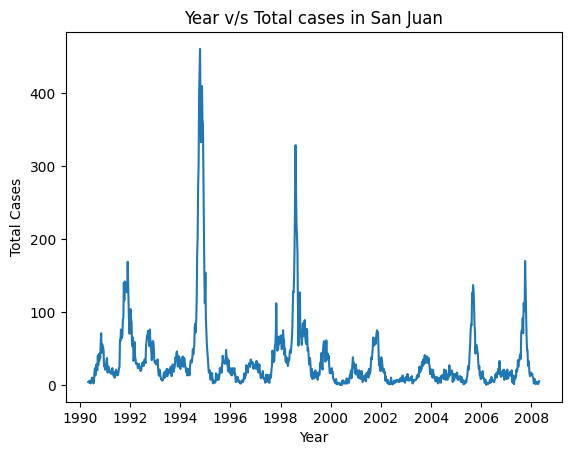

<Figure size 2000x700 with 0 Axes>

In [43]:
fig,ax=plt.subplots()
plt.figure(figsize=(20,7))
ax.plot(df_sj.week_start_date,df_sj["total_cases"])
ax.set_title('Year v/s Total cases in San Juan')
ax.set_xlabel('Year')
ax.set_ylabel("Total Cases")
plt.show()

From the above observation we can see the most no of cases were seen in San Juan than Iquitos

**From this we can infer that city San Juan is more prone to disease.**

Now let us analyse the temperature of both cities over the years

## 2)How does the maximum temperature vary over time in San Juan and Iquitos?

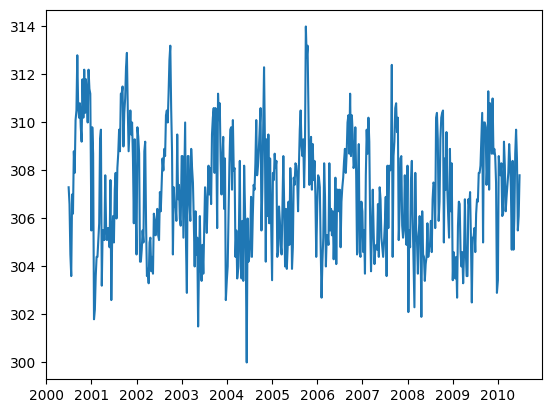

<Figure size 2000x700 with 0 Axes>

In [44]:
fig,ax=plt.subplots()
plt.figure(figsize=(20,7))
ax.plot(df_iq.week_start_date,df_iq["reanalysis_max_air_temp_k"])


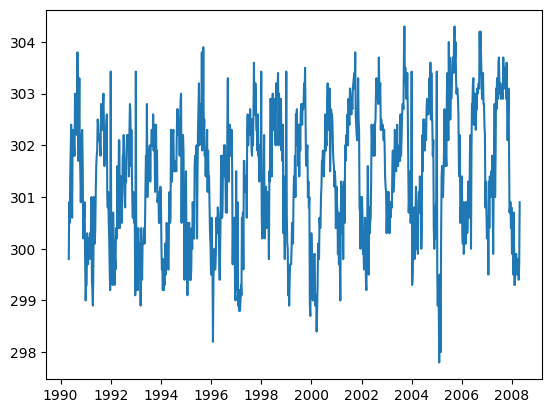

<Figure size 2000x700 with 0 Axes>

In [45]:
fig,ax=plt.subplots()
plt.figure(figsize=(20,7))
ax.plot(df_sj.week_start_date,df_sj["reanalysis_max_air_temp_k"])



## 3)How does precipitation in San Juan compare to Iquitos on a weekly basis?

let us consider the reanalysis precipitations:

In [46]:
df_merge["reanalysis_precip_amt_kg_per_m2"]

0        32.00
1        17.94
2        26.10
3        13.90
4        12.20
         ...  
1451     45.00
1452    207.10
1453     50.60
1454     62.33
1455     36.90
Name: reanalysis_precip_amt_kg_per_m2, Length: 1456, dtype: float64

In [47]:
df_merge["reanalysis_precip_amt_kg_per_m2"].isnull().sum()

0

This implies that there are no null values.

In [48]:
from matplotlib.cbook import boxplot_stats  
boxplot_stats(df_merge.reanalysis_precip_amt_kg_per_m2).pop(0)['fliers']

array([132.4 , 279.6 , 570.5 , 130.3 , 116.79, 128.1 , 142.4 , 118.1 ,
       122.7 , 123.2 , 151.7 , 219.9 , 113.55, 182.  , 124.4 , 143.4 ,
       115.77, 158.72, 138.1 , 140.2 , 133.93, 111.7 , 181.74, 254.95,
       145.8 , 145.7 , 171.58, 174.64, 195.2 , 304.52, 120.32, 114.36,
       164.74, 181.2 , 158.5 , 201.2 , 160.1 , 127.9 , 122.3 , 187.8 ,
       124.2 , 170.6 , 134.46, 186.8 , 362.03, 247.6 , 113.8 , 115.2 ,
       253.3 , 178.89, 135.4 , 133.17, 189.06, 201.4 , 178.2 , 143.8 ,
       113.36, 210.5 , 130.6 , 144.59, 180.99, 227.25, 238.2 , 147.57,
       124.2 , 115.99, 134.66, 143.35, 121.3 , 111.9 , 149.1 , 199.52,
       139.55, 149.77, 124.  , 112.31, 134.43, 208.87, 144.6 , 172.7 ,
       288.4 , 144.98, 191.76, 214.9 , 164.7 , 150.8 , 207.1 ])

<Axes: xlabel='reanalysis_precip_amt_kg_per_m2'>

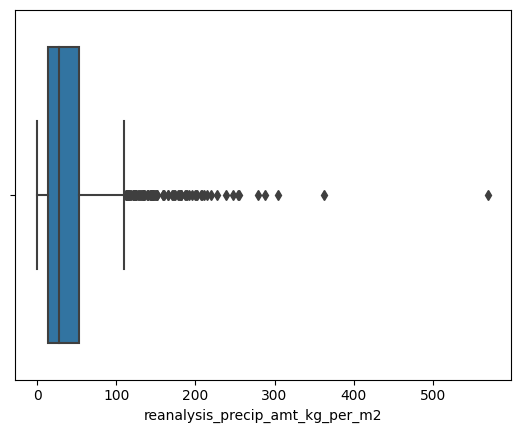

In [49]:
sns.boxplot(x=df_merge['reanalysis_precip_amt_kg_per_m2'])

We have to drop the outlier which is far away or fit the possible outliers in the distribution.

In [50]:
print(df_merge['reanalysis_precip_amt_kg_per_m2'].quantile(0.50)) 
print(df_merge['reanalysis_precip_amt_kg_per_m2'].quantile(0.95)) 


27.369999999999997
121.55


In [51]:
df_merge['reanalysis_precip_amt_kg_per_m2'] = np.where(df_merge['reanalysis_precip_amt_kg_per_m2'] > 122, 27, df_merge['reanalysis_precip_amt_kg_per_m2'])
df_merge.describe()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_K,station_diur_temp_rng_K,station_max_temp_K,station_min_temp_K,station_precip_mm,total_cases
count,1456.000000,1456.000000,1456.000000,1456,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,0.642857,2001.031593,26.503434,2001-07-09 16:01:19.120879104,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,...,82.161959,45.760388,16.746427,4.903754,300.335783,281.209328,305.602437,295.252150,39.326360,24.675137
min,0.000000,1990.000000,1.000000,1990-04-30 00:00:00,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,...,57.787143,0.000000,11.715714,1.357143,294.550000,277.678571,299.850000,287.850000,0.000000,0.000000
25%,0.000000,1997.000000,13.750000,1997-04-28 06:00:00,0.044950,0.049217,0.155087,0.144209,9.800000,297.665000,...,77.226429,9.960000,15.561429,2.328571,299.450000,279.664286,304.250000,294.250000,8.700000,5.000000
50%,1.000000,2002.000000,26.500000,2002-05-28 00:00:00,0.128817,0.121429,0.196050,0.189450,38.340000,298.662143,...,80.369286,38.710000,17.065000,2.864286,300.564286,280.450000,305.950000,295.350000,23.850000,12.000000
75%,1.000000,2005.000000,39.250000,2005-11-26 00:00:00,0.248483,0.216600,0.248846,0.246982,70.235000,299.827500,...,86.041429,70.047500,17.974643,7.553571,301.307143,282.716667,307.050000,296.450000,53.900000,28.000000
max,1.000000,2010.000000,53.000000,2010-06-25 00:00:00,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,...,98.610000,390.600000,20.461429,16.028571,303.950000,288.950000,315.350000,298.750000,543.300000,461.000000
std,0.479322,5.408314,15.019437,NaN,0.140531,0.119999,0.073860,0.083903,43.715537,1.357730,...,7.129271,43.519806,1.537184,3.534237,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000


(1456, 25)

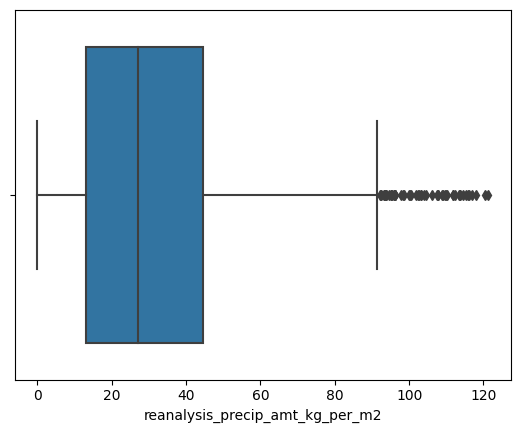

In [52]:
sns.boxplot(x=df_merge['reanalysis_precip_amt_kg_per_m2'])
df_merge.shape

Now let us plot the graphs for both cities individually.

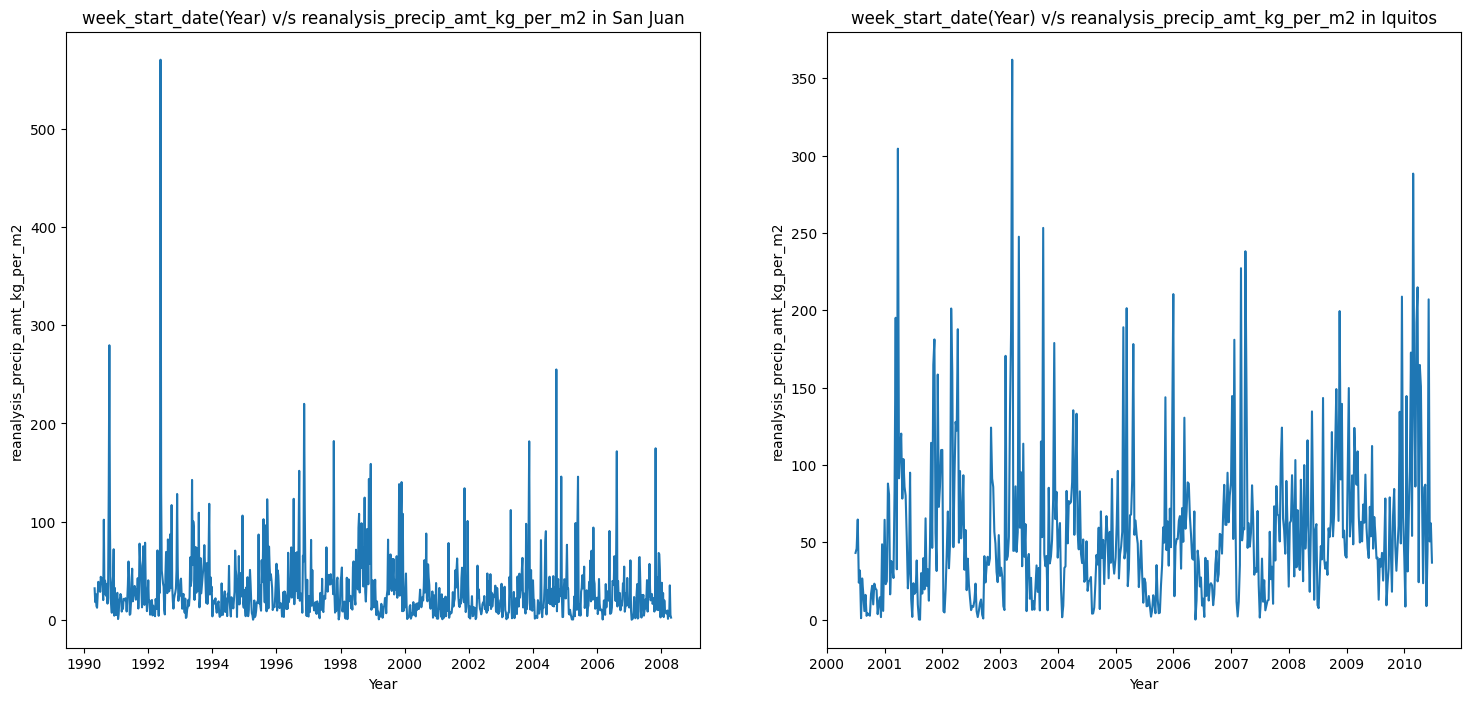

In [53]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

ax[0].plot(df_sj.week_start_date,df_sj["reanalysis_precip_amt_kg_per_m2"])
ax[0].set_title('week_start_date(Year) v/s reanalysis_precip_amt_kg_per_m2 in San Juan')
ax[0].set_xlabel('Year')
ax[0].set_ylabel("reanalysis_precip_amt_kg_per_m2")

ax[1].plot(df_iq.week_start_date,df_iq["reanalysis_precip_amt_kg_per_m2"])
ax[1].set_title('week_start_date(Year) v/s reanalysis_precip_amt_kg_per_m2 in Iquitos')
ax[1].set_xlabel('Year')
ax[1].set_ylabel("reanalysis_precip_amt_kg_per_m2")
plt.show()

## 4) What is the Diurnal temperature range in Iquitos during different seasons?


Let us analyse the feature station_diur_temp_rng_K:

In [54]:
print(df_merge['station_diur_temp_rng_K']);
print("Null values or missing values are:",df_merge['station_diur_temp_rng_K'].isnull().sum());

0       280.050000
1       279.521429
2       279.635714
3       279.921429
4       282.521429
           ...    
1451    285.083333
1452    283.650000
1453    280.050000
1454    281.883333
1455    283.050000
Name: station_diur_temp_rng_K, Length: 1456, dtype: float64
Null values or missing values are: 43


<Axes: xlabel='station_diur_temp_rng_K'>

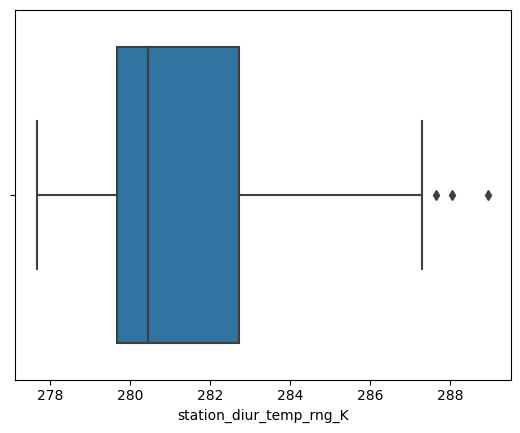

In [55]:
sns.boxplot(x=df_merge['station_diur_temp_rng_K'])

As there are only 3 outliers ,we can fit them by normalization by median.

<Axes: xlabel='station_diur_temp_rng_K'>

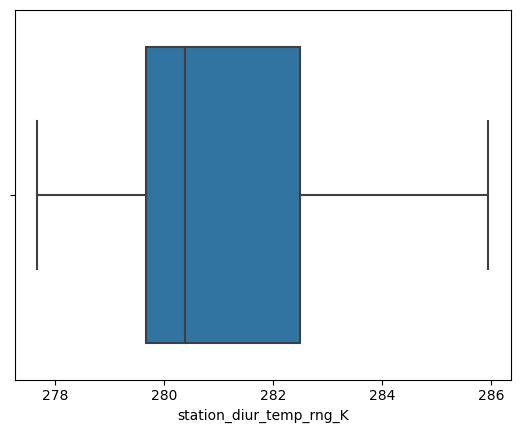

In [56]:
#print(df_merge['station_diur_temp_rng_K'].quantile(0.50)) 
#print(df_merge['station_diur_temp_rng_K'].quantile(0.95)) 
df_merge['station_diur_temp_rng_K'] = np.where(df_merge['station_diur_temp_rng_K'] > 286, 280, df_merge['station_diur_temp_rng_K'])
df_merge.describe()
sns.boxplot(x=df_merge['station_diur_temp_rng_K'])

Two of the outliers were handled.

let us handle the missing values by imputaion by median.

In [57]:
df_merge['station_diur_temp_rng_K'].fillna(df_merge['station_diur_temp_rng_K'].median(),inplace= True)
df_merge['station_diur_temp_rng_K'].isnull().sum()

0

Now let us extract the months from date to find the different seasons:

In [58]:
df_merge['Month'] = pd.DatetimeIndex(df_merge.week_start_date).month
print(df_merge.shape)
df_merge.info()

(1456, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   int32         
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1456 non-null

In [59]:
df_merge['Month'].unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3])

After extracting month ,now let us convert the months as seasons. 

The different seasons in India are:
- Cold Weather Season (Winter) from December to February;
- Hot Weather Season (Summer) from March to May;
- South-West Monsoom Season (Rainy) from June to September;
- Season of Retreating Monsoon (Autumn) from October and November.


In [60]:
df_merge['season']=df_merge['Month']

In [61]:
print(df_merge['season'].unique())
df_merge['season']=df_merge['season'].replace([3,4,5],'summer')
df_merge['season']=df_merge['season'].replace([6,7,8,9],'rainy')
df_merge['season']=df_merge['season'].replace([10,11],'autumn')
df_merge['season']=df_merge['season'].replace([1,2,12],'winter')
df_merge['season'] = df_merge['season'].astype('string')
print(df_merge['season'].unique())

[ 4  5  6  7  8  9 10 11 12  1  2  3]
<StringArray>
['summer', 'rainy', 'autumn', 'winter']
Length: 4, dtype: string


In [62]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   int32         
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1456 non-null   float64 

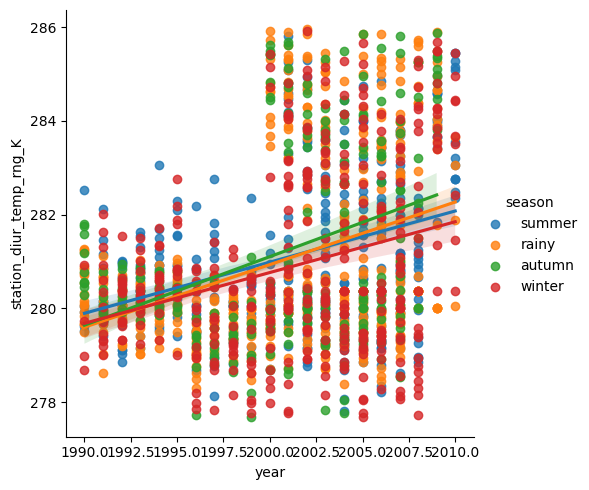

In [63]:
sns.lmplot(data=df_merge, x="year", y="station_diur_temp_rng_K", hue="season")

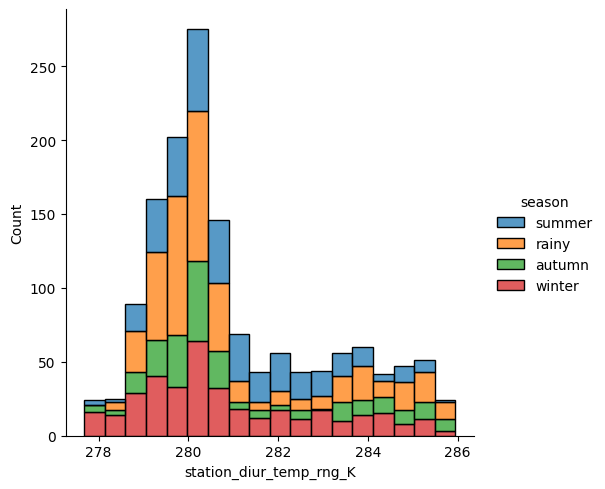

In [64]:
sns.displot(data=df_merge, x="station_diur_temp_rng_K", hue="season", multiple="stack")


In [65]:
df_merge['season'] = df_merge['season'].astype('string')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   int32         
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1456 non-null   float64 

In [66]:
df_merge["season"].unique()

<StringArray>
['summer', 'rainy', 'autumn', 'winter']
Length: 4, dtype: string

## 5) How does the Mean dew points temperature in San Juan change over the years?

In [67]:
df_merge['reanalysis_dew_point_temp_k'].isnull().sum()

0

The mean dew points doesn't contain any missing values.

In [68]:
print(df_sj['reanalysis_dew_point_temp_k'].max())
print(df_sj['reanalysis_dew_point_temp_k'].min())
print(df_sj['reanalysis_dew_point_temp_k'].std())
print(df_sj['reanalysis_dew_point_temp_k'].quantile(0.25))
print(df_sj['reanalysis_dew_point_temp_k'].quantile(0.50))
print(df_sj['reanalysis_dew_point_temp_k'].quantile(0.75))

297.795714286
289.642857143
1.5649361043142538
293.85321428550003
295.447142857
296.415714286


The maximum dew point in all the years is at:

In [69]:
df_sj.shape

(936, 25)

From the correlation matrix plot we can infer that the reanalysis_dew_point_temp_k is strongly  related with station_min_temp

<Axes: xlabel='reanalysis_dew_point_temp_k', ylabel='station_min_temp_K'>

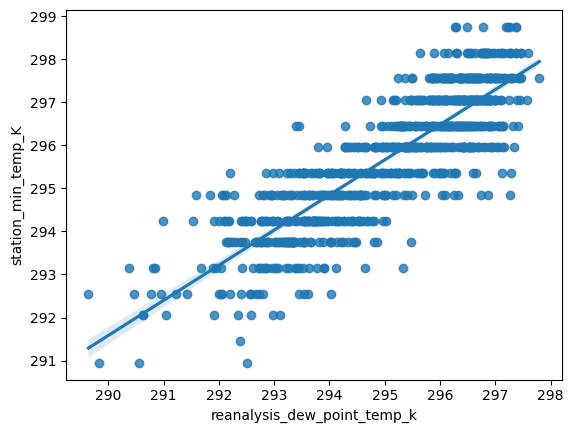

In [70]:
sns.regplot(x='reanalysis_dew_point_temp_k',y='station_min_temp_K',data=df_sj)

## 6) What is the relationship between total precipitation and average temperature in Iquitos?

let us plot correlation matrix for this:

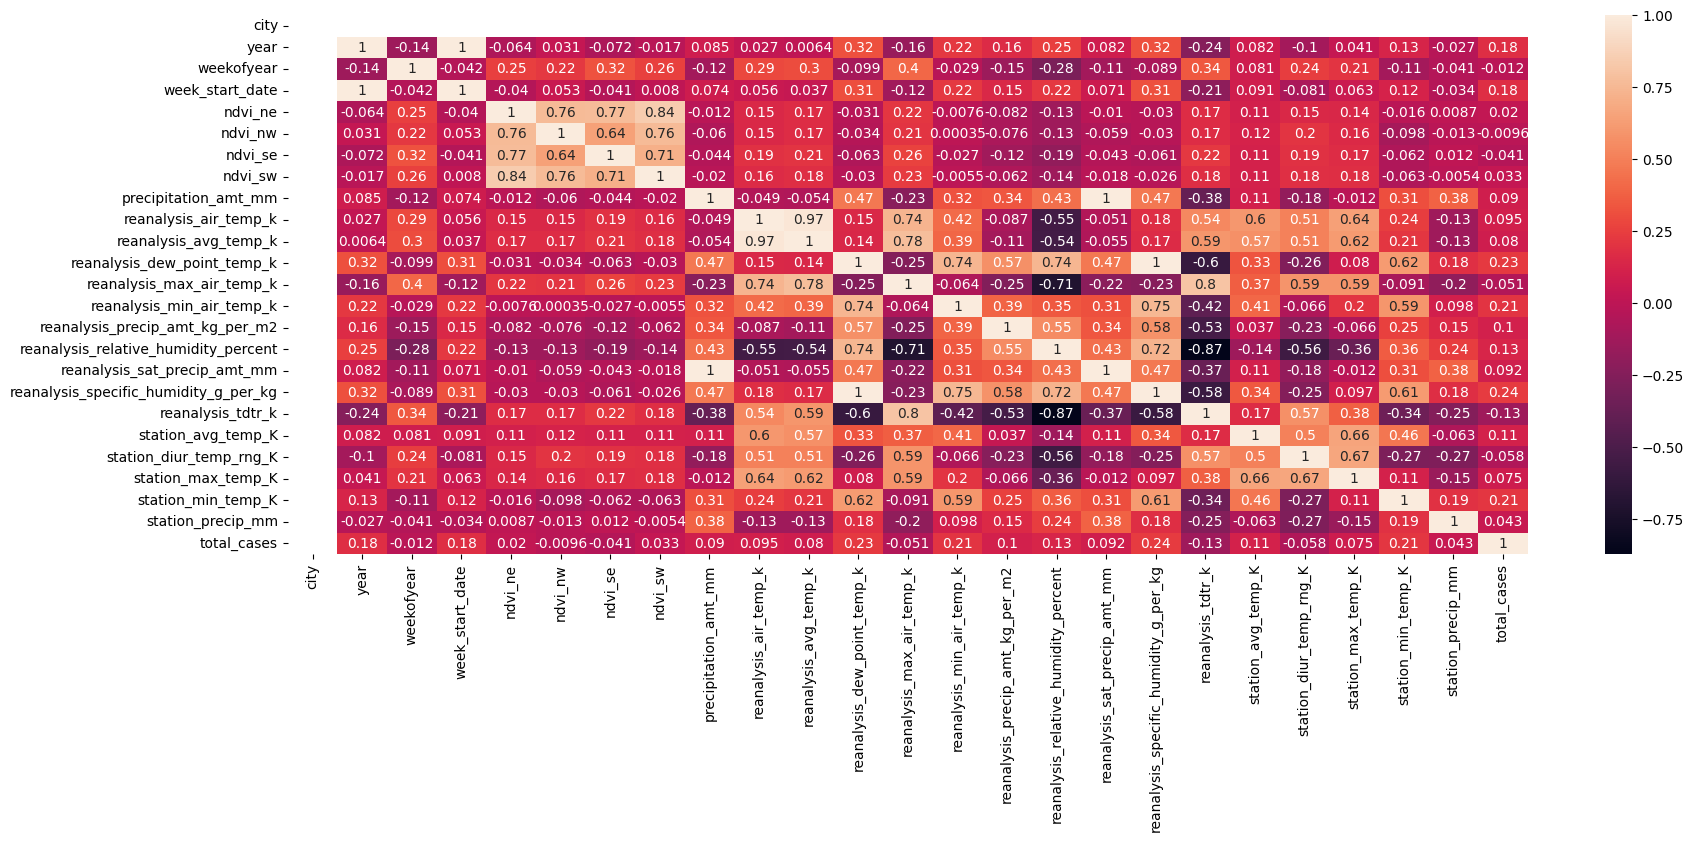

In [71]:
df_iq.corr()
corr = df_iq.corr()
fig, ax = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(data=corr, annot=True, ax=ax)
plt.show()

Write inference from this graph whether they are strongly correlated or how?

## 7)How does specific humidity in San Juan compare to Iquitos during the dry season?

In [72]:
df_merge['reanalysis_specific_humidity_g_per_kg'].isnull().sum()

0

In [73]:
dry_season=df_merge[df_merge['season']=='summer']
dry_season.shape

(364, 27)

<Axes: xlabel='year', ylabel='reanalysis_specific_humidity_g_per_kg'>

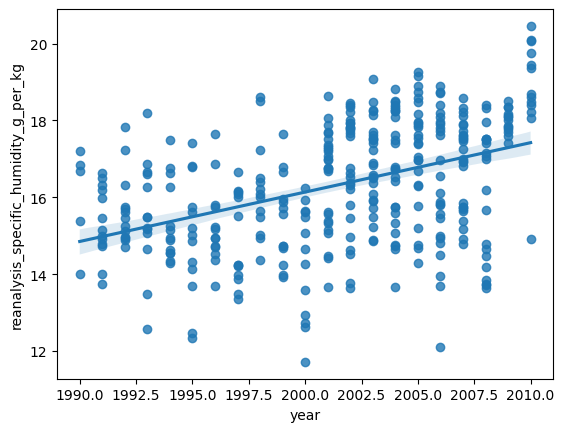

In [74]:
sns.regplot(x='year',y='reanalysis_specific_humidity_g_per_kg',data=dry_season)

## 8) What is the trend in total precipitation in San Juan throughout the years?


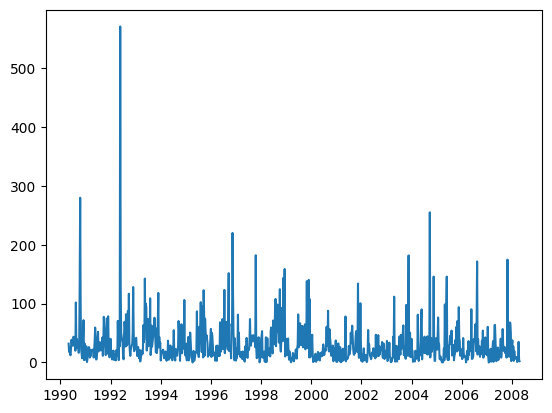

<Figure size 2000x700 with 0 Axes>

In [75]:
fig,ax=plt.subplots()
plt.figure(figsize=(20,7))
ax.plot(df_sj.week_start_date,df_sj["reanalysis_precip_amt_kg_per_m2"])

<Axes: xlabel='year', ylabel='total_cases'>

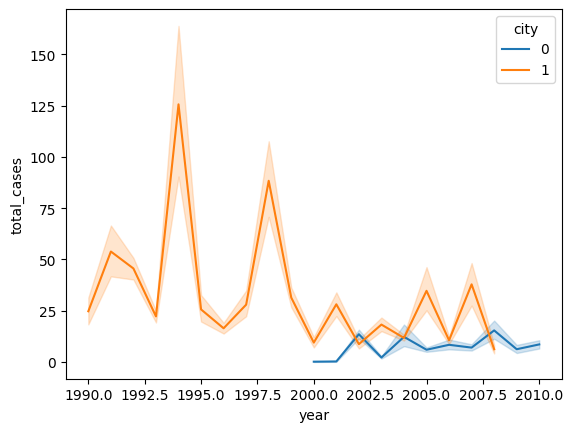

In [76]:
sns.lineplot(data=df_merge, x="year", y="total_cases", hue="city")

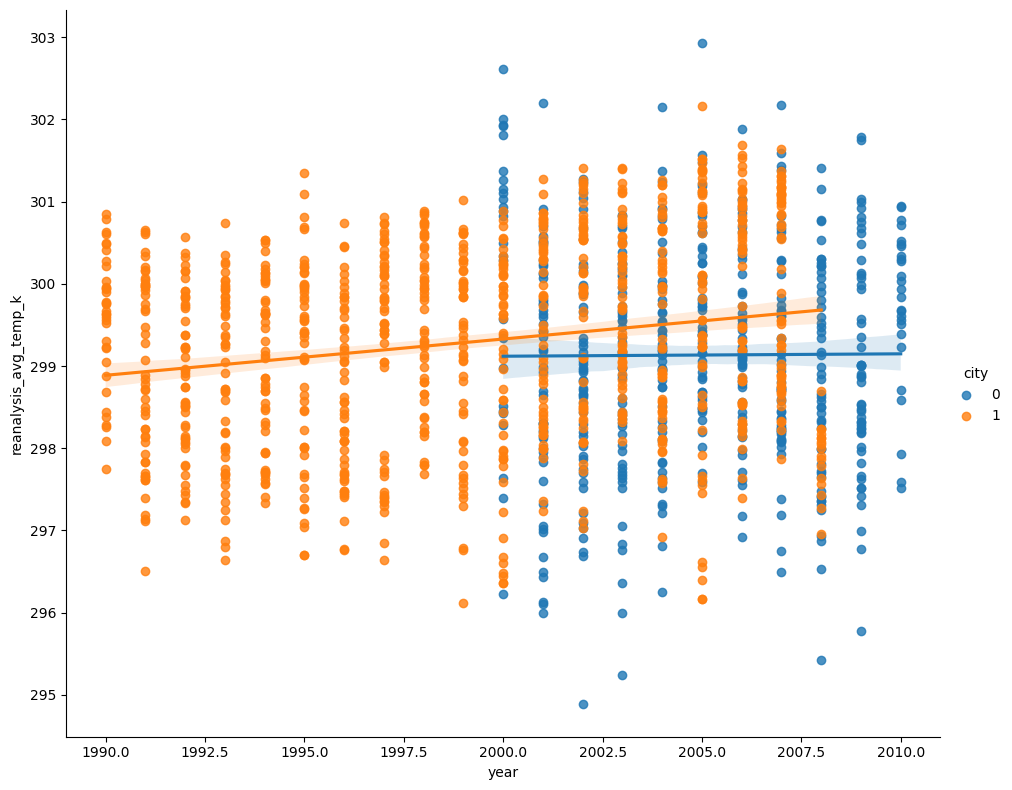

In [77]:
sns.lmplot(data=df_merge, x="year", y="reanalysis_avg_temp_k",hue="city", height=8, aspect=1.2)

From the above lm plot we can see that most no. of cases in a week were in seen in the year 2005 and low no. of cases in a week were seen in the year 2001

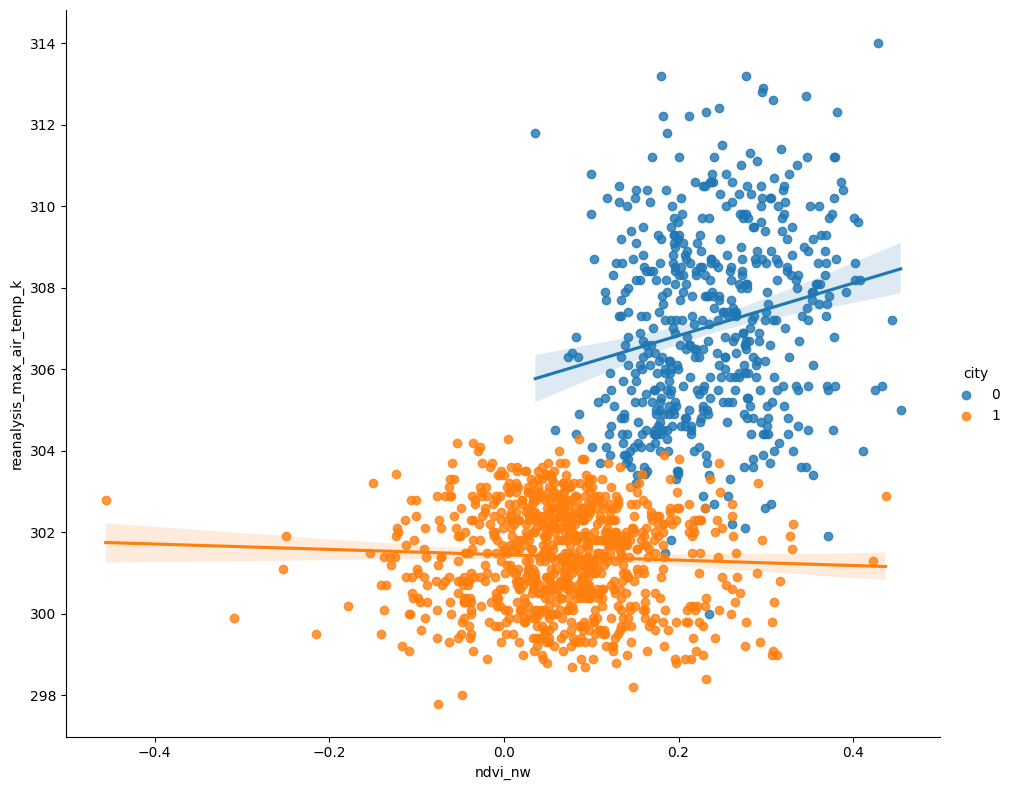

In [78]:
sns.lmplot(data=df_merge, x="ndvi_nw", y="reanalysis_max_air_temp_k",hue="city", height=8, aspect=1.2)